# OpenAI Gym

### Random environment

In [1]:
import random
from typing import List

In [2]:
class Environment: ## random environment that outputs random values
    def __init__(self):
        self.steps_left = 10
        pass
    
    def get_observation(self) -> List[float]:
        return [0.0, 0.0, 0.0]
    
    def get_actions(self) -> List[int]: # list of actions the agent can take
        return [0,1]
    
    def is_done(self) -> bool:
        return self.steps_left == 0
    
    def action(self, action: int) -> float: # similar to step()
        if self.is_done():
            raise Exception("Game is over") 
        self.steps_left -= 1
        return random.random()

In [3]:
class Agent:
    def __init__(self):
        self.total_reward = 0.0
        pass
    
    def step(self, env: Environment):
        current_obs = env.get_observation()
        actions = env.get_actions()
        
        reward = env.action(random.choice(actions))
        self.total_reward += reward

In [4]:
env = Environment()
agent = Agent()
while not env.is_done():
    agent.step(env)
    
print("Total reward got: %.4f" % agent.total_reward)

Total reward got: 5.4977


## OpenAI Gym API

In [5]:
import gym

In [6]:
e = gym.make('CartPole-v0')

In [7]:
obs = e.reset()
print(obs)

[-0.04376711 -0.02621327 -0.02260973  0.02032406]


In [8]:
import pyvirtualdisplay, os
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

In [9]:
frame = e.render("rgb_array")

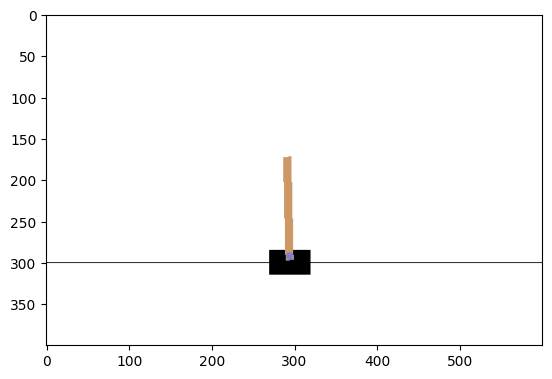

In [10]:
import matplotlib.pyplot as plt
plt.imshow(frame)

In [11]:
e.action_space

Discrete(2)

In [12]:
e.observation_space

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)

In [13]:
e.step(0)

(array([-0.04429137, -0.2210038 , -0.02220325,  0.30578848]), 1.0, False, {})

In [14]:
e.action_space.sample()

0

In [15]:
e.observation_space.sample()

array([-3.9080849e+00, -9.4888677e+37,  3.9955205e-01,  3.3327583e+38],
      dtype=float32)

## Random CartPole agent

In [16]:
env = gym.make("CartPole-v0")
total_reward = 0.0
total_steps = 0
obs = env.reset()

In [17]:
while(True):
    action = env.action_space.sample()
    obs, reward, done, _ = env.step(action)
    total_reward += reward
    total_steps += 1
    if done:
        break

In [18]:
print("Episode done in %d steps, total reward %.2f" %(total_steps, total_reward))

Episode done in 17 steps, total reward 17.00


## Wrapper

In [19]:
from typing import TypeVar
import random

In [20]:
Action = TypeVar("Action")

class RandomActionWrapper(gym.ActionWrapper):
    def __init__(self, env, epsilon=0.1):
        super(RandomActionWrapper, self).__init__(env) # pass env to wrapper
        self.epsilon = epsilon
        pass
    
    
    def action(self, action: Action) -> Action:
        if random.random() < self.epsilon:
            print("Random!")
            return self.env.action_space.sample()
        return action

In [21]:
env = RandomActionWrapper(gym.make("CartPole-v0"), epsilon=0.2) # this becomes a env!

obs = env.reset()
total_reward = 0.0

while(True):
    obs, reward, done, _ = env.step(0)
    total_reward += reward
    if done:
        break
        
print("Total reward", total_reward)

Random!
Total reward 9.0


## Monitor

In [22]:
env = RandomActionWrapper(gym.make("CartPole-v0"), epsilon=0.9) # this becomes a env!

env = gym.wrappers.Monitor(env, "recording")

obs = env.reset()
total_reward = 0.0

while(True):
    obs, reward, done, _ = env.step(0)
    total_reward += reward
    if done:
        break
        
print("Total reward", total_reward)

Random!
Random!
Random!
Random!
Random!
Random!
Random!
Random!
Random!
Random!
Random!
Random!
Random!
Random!
Random!
Random!
Random!
Random!
Random!
Random!
Random!
Random!
Total reward 24.0
